# KNN Classifier

Import everything

In [1]:
# %% Import everything
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## k-Nearest Neighbor

Implementation of kNN as a class

The k-Nearest Neighbor algorithm has the following steps

1. Store all points in the training set in memory
2. For each test sample (query item)
    1. Sort the stored training data in the order of ascending distance from the query item
    2. Pick the first 'k' items in this list of sorted items
    3. Return the result of the vote (either majority, or weighed distances)

Usually, for large datasets, KDTrees are used to speed up nearest neighbor lookups. In this file, simple arrays are used.

In [2]:
# %% kNN Class
class kNNClassifier:
    """
        A class to wrap around the 'k' nearest neighbor classifier.
        Feed it the data, and then use `query` function to query label
        values.
    """

    # Euclidean distance metric
    @staticmethod
    def euclidean_distance(x1, x2):
        return np.linalg.norm(x1 - x2)

    def __init__(self, k, x_train, y_train):
        """
        Initialize the classifier with data

        Parameters:
        - k: int
            The number of neighbors to use for the classifier
        - x_train: numpy.ndarray    shape: n, d
            Training data, 'n' samples, 'd' dimensions per sample
        - y_train: numpy.ndarray    shape: n, 1
            Class values / labels. This classifier works for
            multi-class classification
        """
        self.k = int(k)
        self.x_data = x_train
        self.y_data = y_train
        self.y_oneh = pd.get_dummies(self.y_data)
        self.ytr_labels = list(self.y_oneh.columns)
        # Distance metric
        self.d_metric = kNNClassifier.euclidean_distance

    # Set distance metric
    def set_distance_metric(self, dmetric):
        """
        Sets the distance metric to the given function.

        Parameters:
        - dmetric: (x1, x2) -> dm
            A function that takes two points of shape (d,) and returns
            a metric dm (floating point value)
        """
        self.d_metric = dmetric

    # Query function
    def query_label(self, test_x):
        """
        For the given test sample, find the 'k' nearest neighbors in
        the training set and return the most occurring label for those
        sampoles.

        Parameters:
        - test_x: numpy.ndarray     shape: d, 1
            A test data point, having the same dimensionality as the
            training data given when initializing.

        Returns:
        - res_label: int
            The resulting 'y_data' value of the nearest neighbor
        """
        # Query point
        test_x = np.array(test_x, float)
        # Distance values
        dvals = np.array([self.d_metric(x, test_x) for x in
            self.x_data])
        # Sorted list
        dvals_sorted = np.argsort(dvals)
        # Initial 'k' values
        init_ki = dvals_sorted[:self.k]
        # Labels for the classes (tally of labels)
        cli_val = np.sum(self.y_oneh.iloc[init_ki], axis=0)
        ki = np.argmax(cli_val)
        # Return the label
        return self.ytr_labels[ki]


## Data

Load data, split and visualize data

In [3]:
# %% Import data (Iris dataset)
iris_pd = pd.read_csv("Iris.csv")
# Drop the 'Id' column
iris_pd = iris_pd.drop(columns=["Id"])
# Convert data to points and lables
x_labels = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm",
    "PetalWidthCm"]
X_pd = iris_pd[x_labels]
Y_pd = iris_pd["Species"]
Y_oh_pd = pd.get_dummies(Y_pd)  # One-hot encoded Y
y_classes = list(Y_oh_pd.columns)   # Fields in one-hot

Split data into train and test

In [4]:
# %% Split data
# Data and labels in numpy
X = np.array(X_pd)
Y = np.array(Y_pd)
# Training set and test set (split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.2, random_state=0)

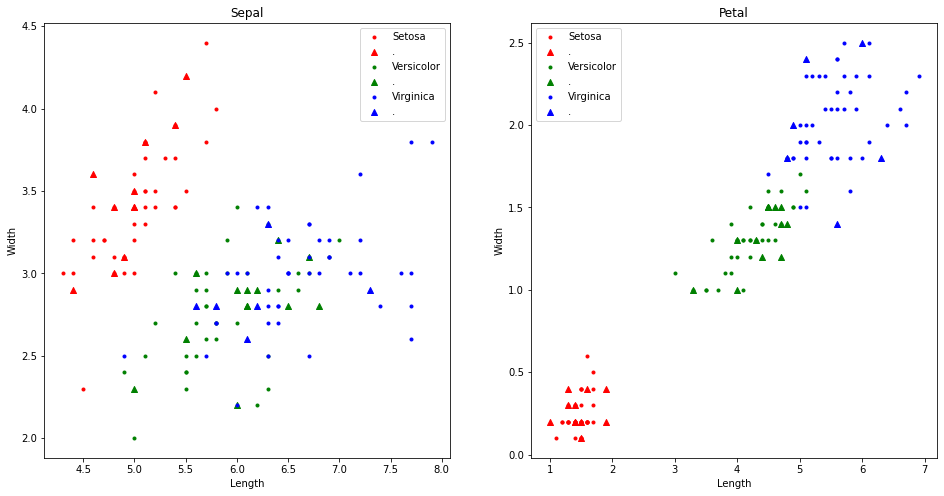

In [5]:
# %% Visualize the data
# Data-point properties for training data
tr_props = {
    "colors": {
        "Iris-setosa": "red",
        "Iris-versicolor": "green",
        "Iris-virginica": "blue"
    },
    "markers": dict((k, '.') for k in y_classes),
    "label": {
        "Iris-setosa": "Setosa",
        "Iris-versicolor": "Versicolor",
        "Iris-virginica": "Virginica"
    }
}
# Data-point properties for testing data
ts_props = {
    "colors": tr_props["colors"],
    "markers": dict((k, '^') for k in y_classes),
    "label": tr_props["markers"]
}
# Plot figure
fig = plt.figure("Iris Dataset", (16, 8))
# Plot for Sepal
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
# Plot class-wise
for g in y_classes:
    # Plot training
    Xtr_g = X_train[Y_train == g]
    Xts_g = X_test[Y_test == g]
    ax1.scatter(Xtr_g[:, 0], Xtr_g[:, 1], c=tr_props["colors"][g],
        marker=tr_props["markers"][g], label=tr_props["label"][g])
    ax2.scatter(Xtr_g[:, 2], Xtr_g[:, 3], c=tr_props["colors"][g],
        marker=tr_props["markers"][g], label=tr_props["label"][g])
    # Plot test
    Xg = X_test[Y_test == g]
    ax1.scatter(Xts_g[:, 0], Xts_g[:, 1], c=ts_props["colors"][g],
        marker=ts_props["markers"][g], label=ts_props["label"][g])
    ax2.scatter(Xts_g[:, 2], Xts_g[:, 3], c=ts_props["colors"][g],
        marker=ts_props["markers"][g], label=ts_props["label"][g])
ax1.set_title("Sepal")
ax2.set_title("Petal")
ax1.legend()
ax2.legend()
ax1.set_xlabel("Length")
ax1.set_ylabel("Width")
ax2.set_xlabel("Length")
ax2.set_ylabel("Width")
plt.show()

## kNN Test

Test the points in `X_test`


In [6]:
# %% Main kNN
# kNN model
knn_model = kNNClassifier(3, X_train, Y_train)
# Query
total_test = len(X_test)
total_pred_corr = 0
for tp in range(total_test):
    y = knn_model.query_label(X_test[tp])
    if Y_test[tp] == y:
        total_pred_corr += 1
    else:
        print(f"Test point: {tp}, test point: {X_test[tp]}")
        print(f"\tPredicted: '{y}', Actual: '{Y_test[tp]}'")
corr_perc = 100*total_pred_corr/total_test
print(f"Total predictions correct: {corr_perc:.3f}%")

Test point: 14, test point: [6.1 2.9 4.7 1.4]
	Predicted: 'Iris-virginica', Actual: 'Iris-versicolor'
Total predictions correct: 96.667%
